<a href="https://colab.research.google.com/github/tanushree2/summer-training/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GO_STP_7383
Task-7

In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables. 

Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

reading the data set

In [3]:
df=pd.read_csv("/content/StudentHoursScores.csv")
df.head(10)

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12
5,8.9,87
6,2.5,21
7,1.9,19
8,2.7,29
9,8.3,81


In [4]:
df.tail()

,Hours,Scores
18,9.6,96
19,4.3,42
20,4.1,40
21,3.0,30
22,2.6,25


In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.size

46

In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
df.shape

(23, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [11]:
df.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [12]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
df.nunique()

Hours     22
Scores    22
dtype: int64

In [14]:
df.corr()

,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


DATA Visualization



No handles with labels found to put in legend.


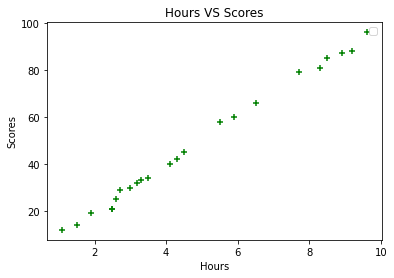

In [19]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.legend()
plt.scatter(df.Hours,df.Scores,color='g',marker='+')


Splitting of Data set into train and test data



In [29]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train




,Hours
16,6.5
10,5.5
4,1.1
2,4.5
18,9.6
6,2.5
7,1.9
1,5.9
14,8.5
0,7.7


In [34]:
y_train

16    66
10    58
4     12
2     45
18    96
6     21
7     19
1     60
14    85
0     79
15    32
22    25
21    30
9     81
8     29
12    14
11    88
5     87
Name: Scores, dtype: int64

Building a model

In [36]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(x_train,y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred=model.predict(x_test)
y_pred

array([40.87711348, 25.025345  , 32.95122924, 34.9327003 , 42.85858454])

In [39]:
y_test

20    40
17    21
3     33
13    34
19    42
Name: Scores, dtype: int64

Finding the coefficient and slope of linear model

In [40]:
print(model.intercept_)

0.2569567372371395


In [41]:
print(model.coef_)

[9.9073553]


Finding the accuracy and MSE of a model

In [53]:
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy",r2_score(y_test,y_pred))

print("MSE",mean_squared_error(y_test,y_pred))



Accuracy 0.9311770139374417
MSE 3.7164412473781487


Finding a score of a student studying for 10 hours

In [55]:
model.predict([[10]])

array([99.33050977])

Actual value

In [ ]:
#y=mx+c
#y=9.77259983*10+0.816828213241493
#y=98.54

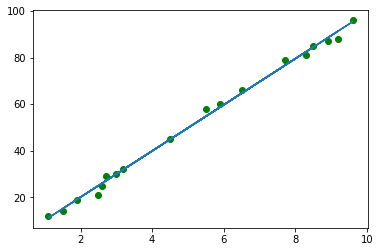

In [56]:
plt.scatter(x_train,y_train,color='g')
plt.plot(x_train,model.predict(x_train))
plt.show()